In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
import numpy as np
from matplotlib import pyplot as plt

In [27]:
import pandas as pd
d=pd.read_csv('/content/drive/MyDrive/collab/who_life_exp.csv')
print(d.isnull())
d1=d.fillna(0)
print(d1)

      country  country_code  region   year  life_expect  life_exp60  \
0       False         False   False  False        False       False   
1       False         False   False  False        False       False   
2       False         False   False  False        False       False   
3       False         False   False  False        False       False   
4       False         False   False  False        False       False   
...       ...           ...     ...    ...          ...         ...   
3106    False         False   False  False        False       False   
3107    False         False   False  False        False       False   
3108    False         False   False  False        False       False   
3109    False         False   False  False        False       False   
3110    False         False   False  False        False       False   

      adult_mortality  infant_mort  age1-4mort  alcohol  ...  che_gdp  \
0               False        False       False    False  ...    False   
1

In [34]:
x1=d1['life_exp60']
y=d1['life_expect']
x2=d1['adult_mortality']
x3=d1['infant_mort']
x4=d1['age1-4mort']
x5=d1['alcohol']
x6=d1['bmi']
x7=d1['age5-19thinness']
x8=d1['age5-19obesity']
x9=d1['hepatitis']
x10=d1['measles']
x11=d1['polio']
x12=d1['diphtheria']
x13=d1['basic_water']

In [41]:
ymean=[]
def linear(b0,b2,b3,b4,b5,b6,b7,b8,b9,b10,b11,b12,b13):
  sum=0;
  ybar=[]
  ypp=[]
  for i in range(0,len(x1)):
    ybar.append(b0+b2*x2[i]+b3*x3[i]+b4*x4[i]+b5*x5[i]+b6*x6[i]+b7*x7[i]+b8*x8[i]+b9*x9[i]+b10*x10[i]+b11*x11[i]+b12*x12[i]+b13*x13[i])
  for i in range(0,len(x1)):
    ypp.append((y[i]-ybar[i])**2)
  for i in range(0,len(x1)):
    sum=sum+ypp[i]
  ymean.append(sum/len(x1))
for i in range(0,300):
  linear(i,i,i,i,i,i,i,i,i,i,i,i,i)

In [60]:
print(ymean)

[4864.54812787901, 341971.22756544984, 1529813.2162944158, 3568390.514314802, 6457703.1216265615, 10197751.038229732, 14788534.264124261, 20230052.79931023, 26522306.643787615, 33665295.7975563, 41659020.26061655, 50503480.03296806, 60198675.114611134, 70744605.50554545, 82141271.205771, 94388672.21528865, 107486808.5340969, 121435680.16219707, 136235287.09958842, 151885629.3462713, 168386706.90224564, 185738519.7675107, 203941067.94206777, 222994351.42591545, 242898370.2190567, 263653124.32148644, 285258613.7332092, 307714838.4542243, 331021798.4845294, 355179493.82412577, 380187924.4730144, 406047090.43119377, 432756991.69866455, 460317628.2754265, 488729000.16148174, 517991107.356827, 548103949.8614632, 579067527.6753902, 610881840.7986082, 643546889.231121, 677062672.9729235, 711429192.0240154, 746646446.3844028, 782714436.0540783, 819633161.0330461, 857402621.321304, 896022816.9188547, 935493747.8256961, 975815414.0418317, 1016987815.5672585, 1059010952.4019728, 1101884824.54598, 

In [43]:
c=0
if(ymean[0]<ymean[1]):
  result=ymean[0]
else:
  result=ymean[1]
for i in range(0,len(ymean)):
  if(result>ymean[i]):
    result=ymean[i]
    c=i
print("the less mean square error is",result)

the less mean square error is 4864.54812787901


In [6]:
y=d1.iloc[:,4:5]
x=d1.iloc[:,5:31]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=30)

In [7]:
print(x_train)

      life_exp60  adult_mortality  infant_mort  age1-4mort   alcohol   bmi  \
961     18.64154         196.5791     0.022605    0.000725   4.92802  26.1   
2132    18.83630         122.9412     0.008045    0.000215   9.68405  25.8   
574     15.63574         236.3218     0.059740    0.005140   3.73168  24.0   
512     14.62447         296.4139     0.111015    0.018845   2.60119  22.3   
251     19.39315         171.1663     0.012775    0.000490  15.64276  26.5   
...          ...              ...          ...         ...       ...   ...   
1164    19.90732         265.9953     0.063725    0.005980   3.48873  24.3   
500     14.98378         282.4788     0.055075    0.010135   3.19286  23.0   
2989    17.15717         215.4495     0.015835    0.000735   9.93247  26.0   
421     15.22812         284.3528     0.078790    0.013620   0.58839  22.8   
1829    17.62829         135.3860     0.043340    0.002145   0.66733  25.2   

      age5-19thinness  age5-19obesity  hepatitis  measles  ... 

In [8]:
print(y_train)

      life_expect
961      70.10404
2132     74.38348
574      61.92902
512      53.09821
251      72.75670
...           ...
1164     63.20292
500      59.16312
2989     69.44698
421      56.48587
1829     69.72105

[2488 rows x 1 columns]


svr

In [72]:
from sklearn import svm
from sklearn.metrics import mean_squared_error
cc=svm.SVR(kernel='rbf')
c1=cc.fit(x_train,y_train)
yp=c1.predict(x_test)
print('mean square error is',mean_squared_error(y_test,yp))
print('percentage is',c1.score(x_test,y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


mean square error is 43.966790812120884
percentage is 0.4404871085949803


decision tree

In [71]:
from sklearn.tree import DecisionTreeRegressor
dt1=DecisionTreeRegressor()
c2=dt1.fit(x_train,y_train)
yp=c2.predict(x_test)
print('mean square error is',mean_squared_error(yp,y_test))
print('percentage is',c1.score(x_test,y_test))

mean square error is 0.7029041614617976
percentage is 0.4404871085949803


[Text(0.4144037904615017, 0.9791666666666666, 'X[20] <= 66.093\nsquared_error = 84.431\nsamples = 2488\nvalue = 69.018'),
 Text(0.14584259094679464, 0.9375, 'X[20] <= 56.61\nsquared_error = 33.742\nsamples = 821\nvalue = 57.909'),
 Text(0.0576708761475914, 0.8958333333333334, 'X[20] <= 50.587\nsquared_error = 13.301\nsamples = 340\nvalue = 52.178'),
 Text(0.03035932941727467, 0.8541666666666666, 'X[20] <= 46.562\nsquared_error = 6.672\nsamples = 120\nvalue = 48.298'),
 Text(0.018953949632940035, 0.8125, 'X[16] <= 3.671\nsquared_error = 5.186\nsamples = 55\nvalue = 46.402'),
 Text(0.015246672196547774, 0.7708333333333334, 'X[19] <= 129.6\nsquared_error = 2.613\nsamples = 46\nvalue = 45.709'),
 Text(0.010630914292485569, 0.7291666666666666, 'X[20] <= 44.821\nsquared_error = 1.225\nsamples = 43\nvalue = 46.013'),
 Text(0.004175624509787325, 0.6875, 'X[3] <= 0.01\nsquared_error = 0.401\nsamples = 24\nvalue = 45.298'),
 Text(0.0007222701854767265, 0.6458333333333334, 'X[12] <= 67.505\nsquar

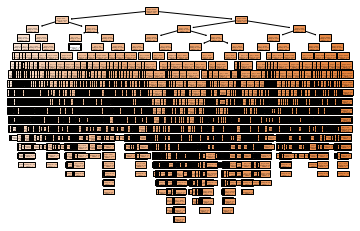

In [68]:
from sklearn import tree
tree.plot_tree(c2,filled=True)

[Text(0.4144037904615017, 0.9791666666666666, 'X[20] <= 66.093\nsquared_error = 84.431\nsamples = 2488\nvalue = 69.018'),
 Text(0.14584259094679464, 0.9375, 'X[20] <= 56.61\nsquared_error = 33.742\nsamples = 821\nvalue = 57.909'),
 Text(0.0576708761475914, 0.8958333333333334, 'X[20] <= 50.587\nsquared_error = 13.301\nsamples = 340\nvalue = 52.178'),
 Text(0.03035932941727467, 0.8541666666666666, 'X[20] <= 46.562\nsquared_error = 6.672\nsamples = 120\nvalue = 48.298'),
 Text(0.018953949632940035, 0.8125, 'X[16] <= 3.671\nsquared_error = 5.186\nsamples = 55\nvalue = 46.402'),
 Text(0.015246672196547774, 0.7708333333333334, 'X[19] <= 129.6\nsquared_error = 2.613\nsamples = 46\nvalue = 45.709'),
 Text(0.010630914292485569, 0.7291666666666666, 'X[20] <= 44.821\nsquared_error = 1.225\nsamples = 43\nvalue = 46.013'),
 Text(0.004175624509787325, 0.6875, 'X[3] <= 0.01\nsquared_error = 0.401\nsamples = 24\nvalue = 45.298'),
 Text(0.0007222701854767265, 0.6458333333333334, 'X[12] <= 67.505\nsquar

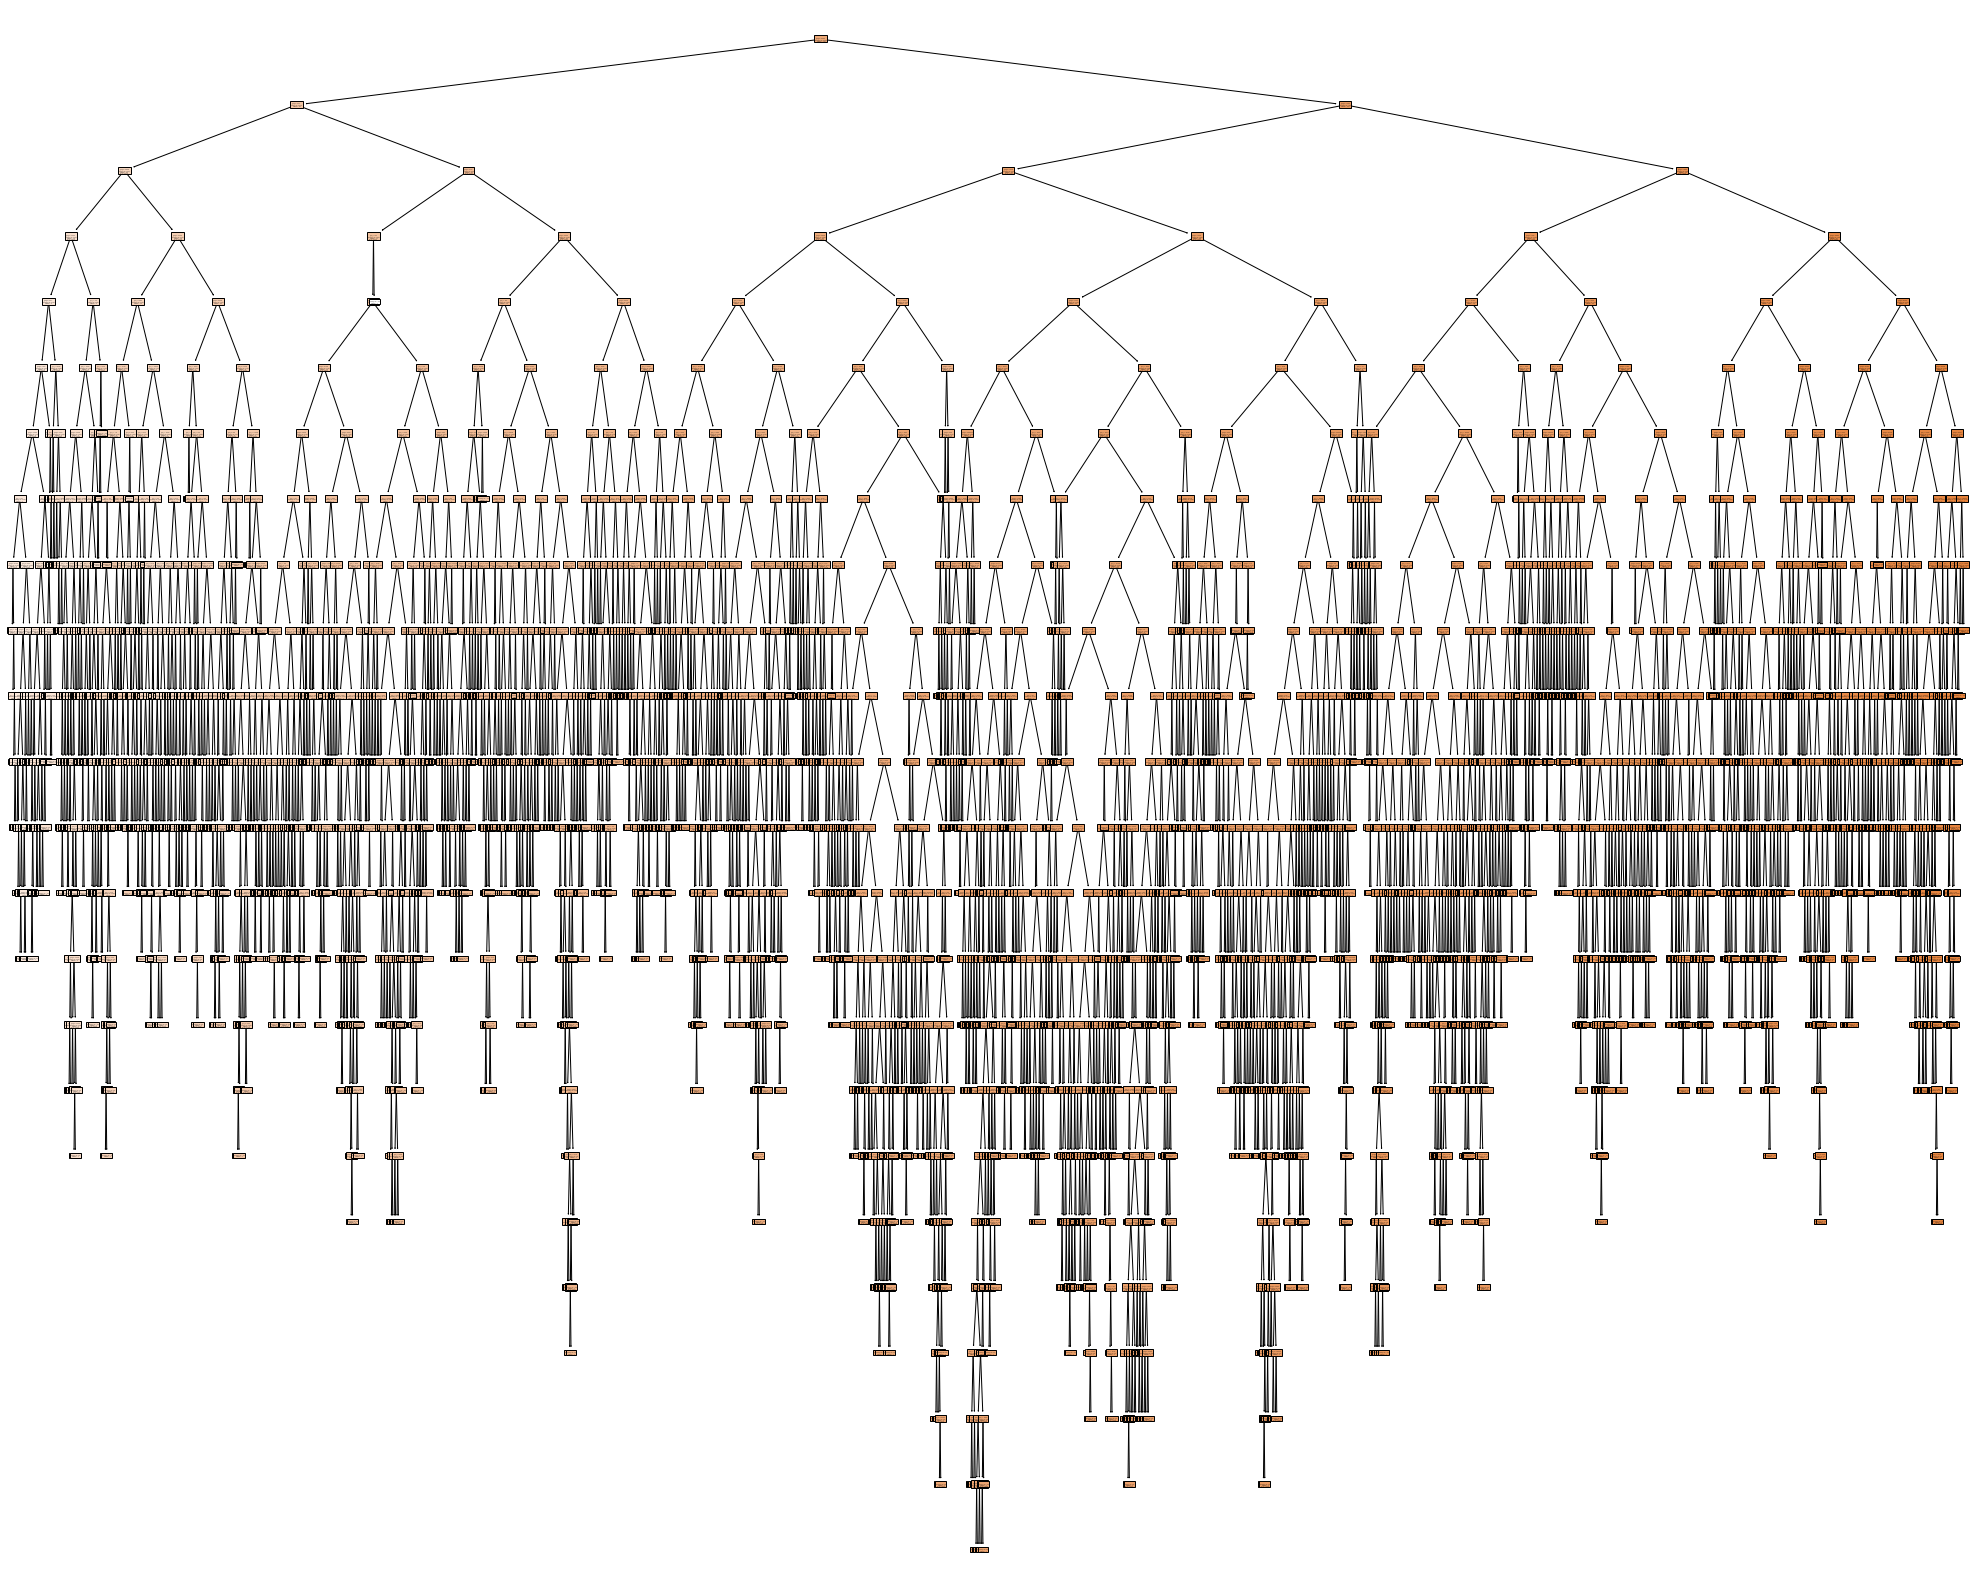

In [ ]:
from sklearn import tree
plt.figure(figsize=(35,29))
tree.plot_tree(c2,filled=True)